In [7]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sn
from datetime import datetime
import matplotlib.pyplot as plt

In [14]:
sample = pd.read_csv('G_PSQL_data/JAN_sample_no_outliers.csv')

In [53]:
delayed = sample[sample['arr_delay'] > 0]
early = sample[sample['arr_delay'] < 0]

In [54]:
early = early.dropna()
delayed = delayed.dropna()

In [18]:
early = early.groupby('branded_code_share', as_index=False)['arr_delay'].mean()

In [19]:
delayed = delayed.groupby('branded_code_share', as_index=False)['arr_delay'].mean()

In [30]:
early.rename(columns={'arr_delay': 'ed'}, inplace=True)

In [32]:
both = early.merge(delayed)

In [34]:
both['avg'] = (both['arr_delay'] + both['ed']) / 2

In [51]:
both = both.groupby('branded_code_share', as_index=False).mean()

C:\Users\broug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arr_delay', ylabel='Density'>

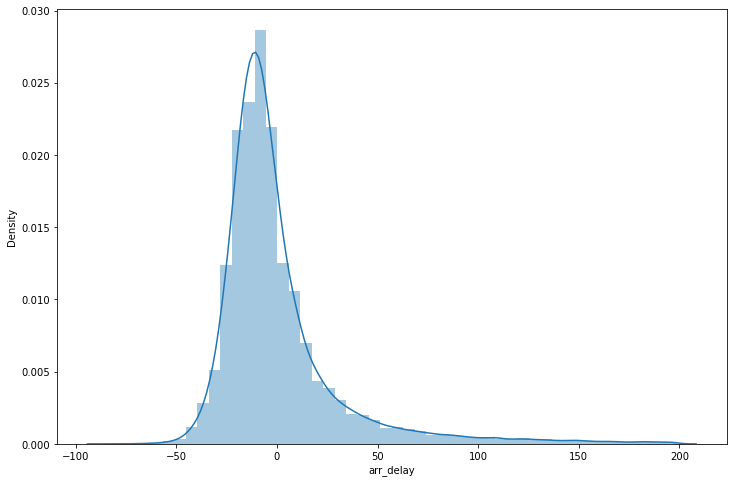

In [10]:
plt.rcParams['figure.figsize'] = [12, 8]
sn.distplot(sample['arr_delay'])

In [94]:
blah = {code:sample[sample['branded_code_share'] == code].arr_delay for code in set(sample['branded_code_share'])}

In [95]:
blah

{'DL': 58       -11.0
 59        -8.0
 60       -22.0
 61       -32.0
 66       -15.0
           ... 
 112182    64.0
 112183   -21.0
 112184    -7.0
 112188    -7.0
 112191   -12.0
 Name: arr_delay, Length: 23264, dtype: float64,
 'F9': 1235      -5.0
 1236     -17.0
 1237      27.0
 1238      36.0
 1239      -9.0
           ... 
 112046   -16.0
 112047     2.0
 112048     2.0
 112063     1.0
 112064   -17.0
 Name: arr_delay, Length: 1745, dtype: float64,
 'VX': 58119      5.0
 58120    -30.0
 58121    -29.0
 58122     -8.0
 58123    -26.0
           ... 
 112027   -16.0
 112028   -11.0
 112029   -11.0
 112030   -18.0
 112031   -27.0
 Name: arr_delay, Length: 483, dtype: float64,
 'NK': 0         -6.0
 4         17.0
 5          1.0
 6        -21.0
 7         22.0
           ... 
 111997   -25.0
 111998   -11.0
 111999   -10.0
 112000    -9.0
 112001    -6.0
 Name: arr_delay, Length: 2530, dtype: float64,
 'UA': 101       10.0
 102       19.0
 103      -18.0
 104       -3.0
 105      

In [99]:
st.f_oneway(blah['DL'], blah['AS'], blah['HA'], blah['WN'], blah['B6'], blah['G4'], blah['AA'], blah['UA'], blah['NK'], blah['VX'], blah['F9'])

F_onewayResult(statistic=75.84080953436685, pvalue=6.523278046273461e-156)

#### the arr time between branded code shares are not equal: good starting point for a feature maybe

In [101]:
len(set(sample['tail_num']))

5922

In [31]:
sample.nunique()

fl_date                  62
mkt_unique_carrier       11
branded_code_share       11
mkt_carrier              11
mkt_carrier_fl_num     6667
op_unique_carrier        28
tail_num               5922
op_carrier_fl_num      6669
origin_airport_id       360
origin                  360
origin_city_name        354
dest_airport_id         360
dest                    360
dest_city_name          354
crs_dep_time           1218
dep_time               1225
dep_delay               262
taxi_out                138
wheels_off             1330
wheels_on              1396
taxi_in                  94
crs_arr_time           1314
arr_time               1267
arr_delay               275
cancelled                 1
diverted                  1
crs_elapsed_time        471
actual_elapsed_time     514
air_time                498
distance               1468
dtype: int64